In [1]:
import csv
import math
import cProfile


def profile_code():
    # Load data from CSV files with a specific delimiter
    def Load_CSV_Data(filename, delimiter=";"):
        data = []
        with open(filename, "r") as file:
            reader = csv.reader(file, delimiter=delimiter)
            next(reader)  # Skip the header
            for row in reader:
                data.append([float(val) for val in row])
        return data

    # Make a prediction using k-nearest neighbors
    def predict(neighbors):
        labels = [neighbor[-1] for neighbor in neighbors]
        prediction = max(set(labels), key=labels.count)
        return prediction

    # Perform k-NNC for a given test dataset
    def k_nnc(train_data, test_data, k):
        predictions = []
        for test_instance in test_data:
            neighbors = find_neighbors(train_data, test_instance, k)
            result = predict(neighbors)
            predictions.append(result)
        return predictions

    # Find k nearest neighbors for a test instance
    def find_neighbors(train_data, test_instance, k):
        distances = []
        for train_instance in train_data:
            dist = euclidean_distance(train_instance[:-1], test_instance[:-1])
            distances.append((train_instance, dist))
        distances.sort(key=lambda x: x[1])
        neighbors = [dist[0] for dist in distances[:k]]
        return neighbors

    train_data = Load_CSV_Data("winequality-white-Train.csv", delimiter=";")
    test_data = Load_CSV_Data("winequality-white-Test.csv", delimiter=";")

    # Calculate Euclidean distance between two data points
    def euclidean_distance(point1, point2):
        squared_distance = sum((x - y) ** 2 for x, y in zip(point1, point2))
        return math.sqrt(squared_distance)

    # Implementing 3-NNC
    k = 3
    PreD_3nnc = k_nnc(train_data, test_data, k)

    # Implementing 1-NNC
    k = 1
    PreD_1nnc = k_nnc(train_data, test_data, k)

    # Calculate accuracy
    def ACCuracy_calc(true_labels, predictions):
        correct = sum(1 for true, pred in zip(true_labels, predictions) if true == pred)
        return correct / len(true_labels)

    true_labels = [instance[-1] for instance in test_data]

    accuracy_1nnc = ACCuracy_calc(true_labels, PreD_1nnc)
    accuracy_3nnc = ACCuracy_calc(true_labels, PreD_3nnc)

    print(f"Accuracy of 1-NNC: {accuracy_1nnc:.2f}")
    print(f"Accuracy of 3-NNC: {accuracy_3nnc:.2f}")

Generated output Data for Train_X,Train_Y,Test_X,Test_Y :
Train_X shape: (1300, 2)
Train_Y shape: (1300,)
Test_X shape: (700, 2)
Test_Y shape: (700,)

Values of Accuracy for Different k Values:
k = 1: Accuracy = 0.694286
k = 2: Accuracy = 0.580000
k = 3: Accuracy = 0.728571
k = 4: Accuracy = 0.668571
k = 5: Accuracy = 0.722857
k = 6: Accuracy = 0.672857
k = 7: Accuracy = 0.718571
k = 8: Accuracy = 0.694286
k = 9: Accuracy = 0.722857
k = 10: Accuracy = 0.698571


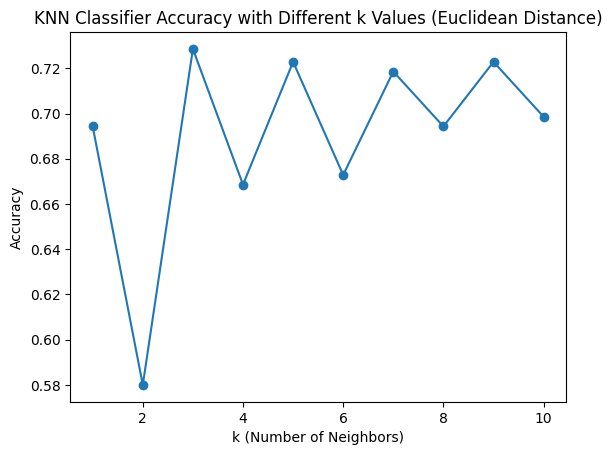

In [2]:
import numpy as np
import matplotlib.pyplot as PLoT


# consider a 2-dimentional classification problem where the data vectors stem from two equiprobable classes w1 and w2.the classes are modelled by gaussian distribution with means m1 = [0, 0] and m2 = [1, 2], ad respective covariance matrices s1=[0.8 0.2, 0.2 0.8] and s1=[0.8 0.2, 0.2 0.8]
# Generate train and test sets namely(Train_X, Test_X, Train_Y, Test_Y) with 2000 and 1000 samples respectively


# (1) Generate Train and Test Sets
np.random.seed(42)

# Class 1 (w1)
m1 = np.array([0, 0])
s1 = np.array([[0.8, 0.2], [0.2, 0.8]])
w1_saMpLeS = np.random.multivariate_normal(m1, s1, 1000)

# Class 2 (w2)
m2 = np.array([1, 2])
s2 = np.array([[0.8, 0.2], [0.2, 0.8]])
w2_saMpLeS = np.random.multivariate_normal(m2, s2, 1000)

# Combining the samples and labels
X = np.vstack((w1_saMpLeS, w2_saMpLeS))
y = np.hstack((np.zeros(1000), np.ones(1000)))

# Split into train and test sets
Train_X, Test_X, Train_Y, Test_Y = X[:1300], X[1300:], y[:1300], y[1300:]

# Display generated data
print("Generated output Data for Train_X,Train_Y,Test_X,Test_Y :")
print("Train_X shape:", Train_X.shape)
print("Train_Y shape:", Train_Y.shape)
print("Test_X shape:", Test_X.shape)
print("Test_Y shape:", Test_Y.shape)


# building knn classifier with different values of k from 1 to 10.Using euclidean distance measure


# Step 2: Implement KNN Classifier
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))


# finding KNN-predict


def knn_predict(train_X, train_Y, test_sample, k):
    distances = [
        (train_Y[i], euclidean_distance(train_X[i], test_sample))
        for i in range(len(train_X))
    ]
    sorted_distances = sorted(distances, key=lambda x: x[1])
    k_nearest = sorted_distances[:k]
    counts = np.bincount([label for label, _ in k_nearest])
    return np.argmax(counts)


# Finding KNN-Accuracy


def knn_accuracy(train_X, train_Y, test_X, test_Y, k):
    predictions = [
        knn_predict(train_X, train_Y, test_sample, k) for test_sample in test_X
    ]
    accuracy = np.mean(predictions == test_Y)
    return accuracy


# plot accuracy of test set with different k values....

# Step 3: Plot Accuracy for Different k Values

k_values = list(range(1, 11))
accuracies = [knn_accuracy(Train_X, Train_Y, Test_X, Test_Y, k) for k in k_values]

# Display accuracy for different k values
print("\nValues of Accuracy for Different k Values:")
for k, accuracy in zip(k_values, accuracies):
    print(f"k = {k}: Accuracy = {accuracy:.6f}")

# Plotting
PLoT.plot(k_values, accuracies, marker="o")
PLoT.title("KNN Classifier Accuracy with Different k Values (Euclidean Distance)")
PLoT.xlabel("k (Number of Neighbors)")
PLoT.ylabel("Accuracy")
PLoT.show()

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.impute import SimpleImputer

data_set = pd.read_csv("weatherAUS.csv")

data_set = data_set.dropna(subset=["RainTomorrow"])

data_set = data_set.drop(["Date", "WindDir9am"], axis=1)

data_set["RainToday"] = data_set["RainToday"].map({"Yes": 1, "No": 0})
data_set["RainTomorrow"] = data_set["RainTomorrow"].map({"Yes": 1, "No": 0})

data_set = pd.get_dummies(data_set)

value = SimpleImputer(strategy="mean")
x_value = value.fit_transform(data_set.drop("RainTomorrow", axis=1))

x_value_data_set = pd.DataFrame(
    x_value, columns=data_set.drop("RainTomorrow", axis=1).columns
)

X = x_value_data_set
y = data_set["RainTomorrow"]

(
    first_train_data,
    first_test_data,
    second_train_data,
    second_test_data,
) = train_test_split(X, y, test_size=0.2, random_state=42)

random_forest = RandomForestClassifier()

random_forest.fit(first_train_data, second_train_data)

result = random_forest.predict(first_test_data)

result1 = accuracy_score(second_test_data, result)
result2 = precision_score(second_test_data, result)
result3 = recall_score(second_test_data, result)

print("Accuracy:", result1)
print("Precision:", result2)
print("Recall:", result3)

cProfile.run("profile_code")

Accuracy: 0.9989187288470837
Precision: 0.9989829049798536
Recall: 0.9962159631739097
         3 function calls in 0.000 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.000    0.000 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}


